In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Hop Flavors Import
hop_data = pd.read_csv(r'/Users/williamcasterlin/Desktop/Python Brewing/Hop_Flavors.csv')
drop_columns = ['Country of Origin', 'Use']
hop_flavors = hop_data.drop(drop_columns, axis=1)
hop_flavors.set_index('Hop', inplace = True)

hop_flavors.head()

,Citrus,Tropical Fruit,Stone Fruit,Berry,Floral,Grassy,Herbal,Spice,Pine/Resin
Hop,,,,,,,,,
Adeena,0,0,0,0,0,0,0,0,0
Ahtanum,2,0,1,2,4,1,2,3,1
Aloha Blend,2,0,0,0,2,0,1,3,3
Altus,2,0,0,0,0,0,1,4,4
Amarillo,4,1,1,0,1,0,0,0,0


In [59]:
#Draw Radar Chart

#Comparison Axi
characteristics = ['Citrus','Tropical Fruit','Stone Fruit', 'Berry', 'Floral', 'Grassy', 'Herbal', 'Spice',
                   'Pine/Resin']

#Hops to Compare
hops = ['Adeena', 'Ahtanum', 'Aloha Blend', 'Altus', 'Amarillo']

#Graph Labels
labels = np.array(characteristics)

#Select Hops for Chart
#hop_comparison = hop_flavors.loc[hops, labels].values
choose = 'Ahtanum'
my_hop = hop_flavors.loc[choose, labels].values

angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

#Close Plot

#hop_comparison = np.concatenate((hop_comparison, [hop_comparison[0]]))
my_hop = np.concatenate((my_hop, [my_hop[0]]))
angles = np.concatenate((angles, [angles[0]]))




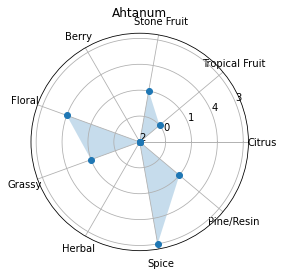

In [60]:
#Draw Chart
fig = plt.show()
ax = plt.subplot(111, polar = True)
ax.plot(angles, my_hop, 'o', linewidth=2)
ax.fill(angles, my_hop, alpha = 0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title(hops)
ax.set_title(choose)
ax.grid(True)
